**OBJECTIVE**: To determine whether the person is having cancer or not by classifying as malignant or beginin.

Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [117]:
df.drop('Unnamed: 32',axis=1,inplace=True)

**Understanding the data**

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [119]:
df.shape

(569, 32)

In [120]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [121]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


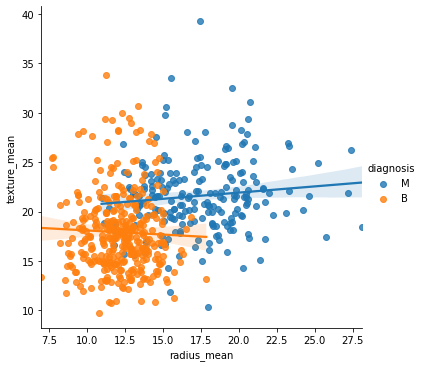

In [8]:
sns.lmplot(x ='radius_mean', y='texture_mean',hue='diagnosis', data = df)

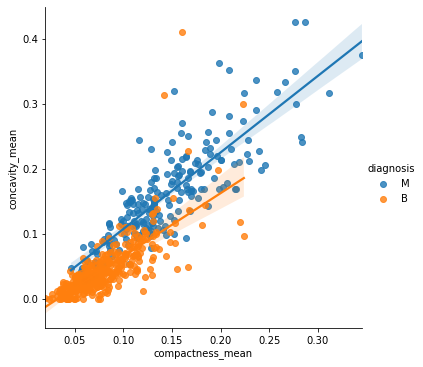

In [9]:
sns.lmplot(x ='compactness_mean', y='concavity_mean',hue='diagnosis', data = df)

We have a dataset of 569 rows and 33 columns.

As there are no null values the dataset is clean to proceed for further analysis.

In [10]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


In [11]:
k=df.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]> abs(0.5)) and (i!=j)]
z

[['radius_mean', 'perimeter_mean'],
 ['radius_mean', 'area_mean'],
 ['radius_mean', 'compactness_mean'],
 ['radius_mean', 'concavity_mean'],
 ['radius_mean', 'concave points_mean'],
 ['radius_mean', 'radius_se'],
 ['radius_mean', 'perimeter_se'],
 ['radius_mean', 'area_se'],
 ['radius_mean', 'radius_worst'],
 ['radius_mean', 'perimeter_worst'],
 ['radius_mean', 'area_worst'],
 ['radius_mean', 'concavity_worst'],
 ['radius_mean', 'concave points_worst'],
 ['texture_mean', 'texture_worst'],
 ['perimeter_mean', 'radius_mean'],
 ['perimeter_mean', 'area_mean'],
 ['perimeter_mean', 'compactness_mean'],
 ['perimeter_mean', 'concavity_mean'],
 ['perimeter_mean', 'concave points_mean'],
 ['perimeter_mean', 'radius_se'],
 ['perimeter_mean', 'perimeter_se'],
 ['perimeter_mean', 'area_se'],
 ['perimeter_mean', 'radius_worst'],
 ['perimeter_mean', 'perimeter_worst'],
 ['perimeter_mean', 'area_worst'],
 ['perimeter_mean', 'concavity_worst'],
 ['perimeter_mean', 'concave points_worst'],
 ['area_mean

radius, perimeter, area,compactness, concavity, concavepoints

In [12]:
df.head(8)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN


In [13]:
x=df[['radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concave points_worst','compactness_worst']]

In [14]:
y=df[['diagnosis']]

In [61]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [62]:
scaler.fit(X_train)

StandardScaler()

In [63]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Splitting the data for training and testing**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=52)

In [64]:
X_train

array([[-0.58372956, -0.58153239, -0.61876916, ..., -0.51839823,
        -0.80549617, -0.49180906],
       [-0.04010572, -0.12421016, -0.13701959, ..., -0.88958728,
        -1.07309066, -0.82672415],
       [ 0.32638225,  0.30336392,  0.24735507, ...,  0.50745549,
         0.5864904 , -0.13022481],
       ...,
       [ 0.14313826,  0.13686311,  0.02826152, ...,  0.46542897,
         0.12063765, -0.3659058 ],
       [-1.76901277, -1.68265775, -1.39488566, ...,  0.62404518,
        -0.55585482,  1.08167164],
       [-1.66150963, -1.62671348, -1.33915134, ..., -0.81909118,
        -0.45788645, -0.2052706 ]])

In [67]:
dataset_scaled = pd.DataFrame(X_train)
dataset_scaled.head()

,0,1,2,3,4,5,6
0,-0.583730,-0.581532,-0.618769,-0.120477,-0.518398,-0.805496,-0.491809
1,-0.040106,-0.124210,-0.137020,-1.061558,-0.889587,-1.073091,-0.826724
2,0.326382,0.303364,0.247355,-0.118376,0.507455,0.586490,-0.130225
3,-0.299701,-0.379955,-0.370207,-1.264978,-0.819498,-0.999421,-1.304970
4,0.240868,0.209235,0.113465,-0.286269,-0.615195,-0.489459,-0.424826


In [68]:
dataset_scaled = pd.DataFrame(X_test)
dataset_scaled.head()

,0,1,2,3,4,5,6
0,-0.092025,-0.108226,-0.219020,0.059450,-0.436785,0.211951,0.000020
1,-0.632595,-0.686317,-0.646316,-1.076838,-0.899484,-0.800853,-1.039085
2,-1.069326,-1.079703,-0.977519,-0.686042,-0.828581,-1.291624,-1.057195
3,-0.690622,-0.678325,-0.693402,-0.129072,-0.450749,-0.212114,-0.441572
4,-0.360783,-0.367523,-0.424340,-0.404883,-0.375779,-0.261176,0.027309


**Using the model of KNN**

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [70]:
accuracy_score1 = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)
    accuracy_score1.append(accuracy)
    print("Accuracy Score=",i, "is",accuracy)

<ipython-input-70-b40f4f21656e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-70-b40f4f21656e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-70-b40f4f21656e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-70-b40f4f21656e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-70-b40f4f21656e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Accuracy Score= 1 is 0.9122807017543859
Accuracy Score= 2 is 0.9122807017543859
Accuracy Score= 3 is 0.9415204678362573
Accuracy Score= 4 is 0.935672514619883
Accuracy Score= 5 is 0.935672514619883
Accuracy Score= 6 is 0.9415204678362573
Accuracy Score= 7 is 0.9532163742690059
Accuracy Score= 8 is 0.935672514619883
Accuracy Score= 9 is 0.9415204678362573
Accuracy Score= 10 is 0.9473684210526315
Accuracy Score= 11 is 0.9532163742690059
Accuracy Score= 12 is 0.9473684210526315
Accuracy Score= 13 is 0.9473684210526315
Accuracy Score= 14 is 0.9473684210526315
Accuracy Score= 15 is 0.9532163742690059
Accuracy Score= 16 is 0.9532163742690059
Accuracy Score= 17 is 0.9590643274853801
Accuracy Score= 18 is 0.9532163742690059
Accuracy Score= 19 is 0.9473684210526315
Accuracy Score= 20 is 0.9473684210526315
Accuracy Score= 21 is 0.9473684210526315
Accuracy Score= 22 is 0.9473684210526315
Accuracy Score= 23 is 0.935672514619883
Accuracy Score= 24 is 0.9415204678362573
Accuracy Score= 25 is 0.94152

<ipython-input-70-b40f4f21656e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-70-b40f4f21656e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-70-b40f4f21656e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-70-b40f4f21656e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-70-b40f4f21656e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

Accuracy Score= 29 is 0.9473684210526315
Accuracy Score= 30 is 0.9415204678362573
Accuracy Score= 31 is 0.9415204678362573
Accuracy Score= 32 is 0.9415204678362573
Accuracy Score= 33 is 0.9415204678362573
Accuracy Score= 34 is 0.935672514619883
Accuracy Score= 35 is 0.935672514619883
Accuracy Score= 36 is 0.9415204678362573
Accuracy Score= 37 is 0.935672514619883
Accuracy Score= 38 is 0.9415204678362573
Accuracy Score= 39 is 0.935672514619883


<ipython-input-70-b40f4f21656e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-70-b40f4f21656e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-70-b40f4f21656e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-70-b40f4f21656e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)
<ipython-input-70-b40f4f21656e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [71]:
data = pd.DataFrame(accuracy_score1,columns=["accuracy"])
data

,accuracy
0,0.912281
1,0.912281
2,0.941520
3,0.935673
4,0.935673
5,0.941520
6,0.953216
7,0.935673
8,0.941520
9,0.947368


In [72]:
data["k_value"]= range(1,40)
data

,accuracy,k_value
0,0.912281,1
1,0.912281,2
2,0.941520,3
3,0.935673,4
4,0.935673,5
5,0.941520,6
6,0.953216,7
7,0.935673,8
8,0.941520,9
9,0.947368,10


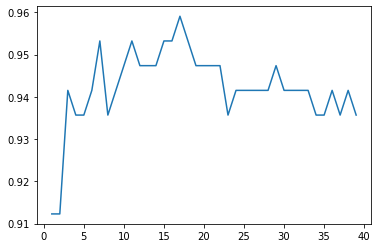

In [89]:
plt.plot(data["k_value"],data["accuracy"])

In [75]:
error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train.values.ravel())
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test.values.ravel()))

In [76]:
error_rate

[0.08771929824561403,
 0.08771929824561403,
 0.05847953216374269,
 0.06432748538011696,
 0.06432748538011696,
 0.05847953216374269,
 0.04678362573099415,
 0.06432748538011696,
 0.05847953216374269,
 0.05263157894736842,
 0.04678362573099415,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.04678362573099415,
 0.04678362573099415,
 0.04093567251461988,
 0.04678362573099415,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.06432748538011696,
 0.05847953216374269,
 0.05847953216374269,
 0.05847953216374269,
 0.05847953216374269,
 0.05847953216374269,
 0.05263157894736842,
 0.05847953216374269,
 0.05847953216374269,
 0.05847953216374269,
 0.05847953216374269,
 0.06432748538011696,
 0.06432748538011696,
 0.05847953216374269,
 0.06432748538011696,
 0.05847953216374269,
 0.06432748538011696]

Text(0, 0.5, 'Mean Error')

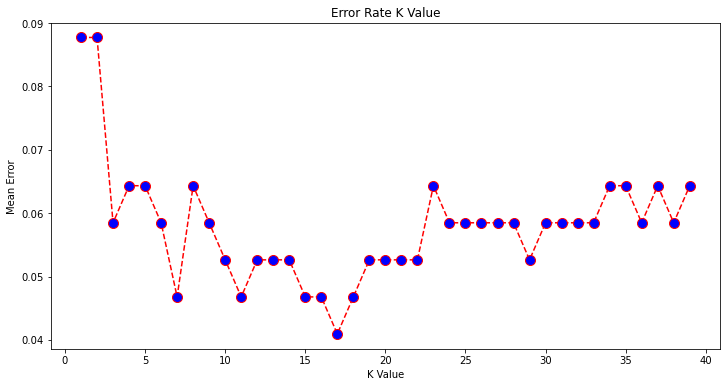

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [78]:
knn.score(X_test, y_test)

0.935672514619883

In [79]:
predictions=knn.predict(X_test)
predictions

array(['B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'B'], dtype=object)

In [80]:
from sklearn.metrics import confusion_matrix, classification_report

In [81]:
matrix=confusion_matrix(y_test,predictions)
print(matrix) 

[[103   4]
 [  7  57]]


In [82]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.94      0.96      0.95       107
           M       0.93      0.89      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



**Model Using Decision Tree.**

In [99]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn import tree

In [94]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [96]:
dt_model = dt(random_state=10)

In [97]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [100]:
text_representation = tree.export_text(dt_model)
print(text_representation)

|--- feature_5 <= 0.43
|   |--- feature_2 <= 0.18
|   |   |--- feature_5 <= -0.06
|   |   |   |--- feature_5 <= -0.33
|   |   |   |   |--- class: B
|   |   |   |--- feature_5 >  -0.33
|   |   |   |   |--- feature_5 <= -0.33
|   |   |   |   |   |--- class: M
|   |   |   |   |--- feature_5 >  -0.33
|   |   |   |   |   |--- class: B
|   |   |--- feature_5 >  -0.06
|   |   |   |--- feature_3 <= -0.63
|   |   |   |   |--- class: M
|   |   |   |--- feature_3 >  -0.63
|   |   |   |   |--- feature_4 <= 0.42
|   |   |   |   |   |--- feature_0 <= -0.14
|   |   |   |   |   |   |--- class: B
|   |   |   |   |   |--- feature_0 >  -0.14
|   |   |   |   |   |   |--- feature_1 <= 0.01
|   |   |   |   |   |   |   |--- class: M
|   |   |   |   |   |   |--- feature_1 >  0.01
|   |   |   |   |   |   |   |--- class: B
|   |   |   |   |--- feature_4 >  0.42
|   |   |   |   |   |--- feature_0 <= -0.72
|   |   |   |   |   |   |--- class: B
|   |   |   |   |   |--- feature_0 >  -0.72
|   |   |   |   |   |   |-

In [101]:
dt_model.score(X_train, y_train)

1.0

In [103]:
dt_model.score(X_test, y_test)

0.9298245614035088

In [104]:
dt_model.predict(X_test)

array(['M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B',
       'B', 'B'], dtype=object)

In [108]:
y_pred = dt_model.predict_proba(X_test)[:,1]

In [109]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append(0)
    else:
        y_new.append(1)

In [113]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append('Malignant')
    else:
        y_new.append('Benign')

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_new)

0.0

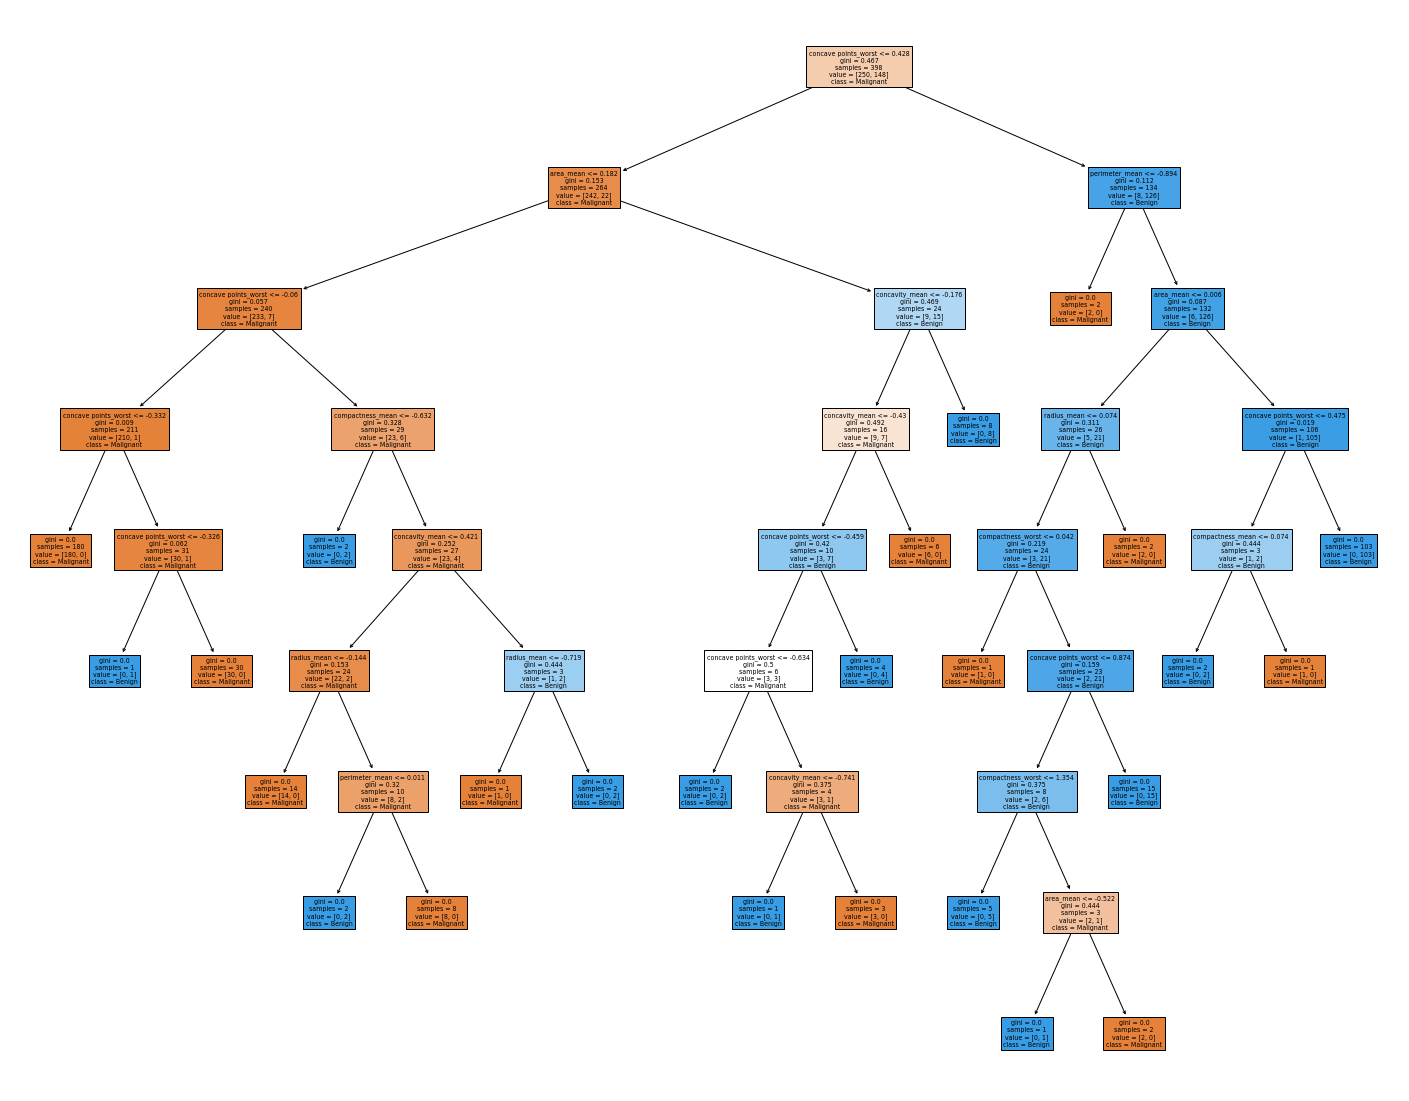

In [122]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model, 
                   feature_names=list(x.columns),  
                   class_names=['Malignant','Benign'],
                   filled=True)